# Initial Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 7.33 s, sys: 1.16 s, total: 8.5 s
Wall time: 15.5 s


In [3]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Import Data

In [8]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/HOLD/'

In [9]:
train_df = pd.read_excel(folder_path + "training_data_telugu-hate.xlsx")
test_df= pd.read_excel(folder_path + "telugu-hate-speech-test.xlsx")
test_with_label = pd.read_excel(folder_path + "telugu-english-test-data-with-labels.xlsx")
print("Total number of training samples:", len(train_df))
print("Total number of test samples:", len(test_df))

Total number of training samples: 4000
Total number of test samples: 499


In [ ]:
test_with_label

,id,text,label
0,1,ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూ...,non-hate
1,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.,non-hate
2,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...,non-hate
3,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...,non-hate
4,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...,non-hate
...,...,...,...
495,496,డబ్బు ఇస్తే నిన్నుకూడ ఎస్తాడు,hate
496,497,నిది చూపించు దెబ్బకి సెట్ ఐపోయిది రోజాకు,hate
497,498,ఏది నాకిన నీది మాత్రం కచ్చితంగా నాకడు చీ రెడ్డి,hate
498,499,ఇప్పుడు నిదిఐన నకుతాడు డబ్బులు ఇస్తే,hate


In [ ]:
test_df

,1,"ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,"
0,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.
1,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...
2,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...
3,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...
4,6,వావ్ సూపర్ అమ్మ god bless u తల్లి
...,...,...
494,496,డబ్బు ఇస్తే నిన్నుకూడ ఎస్తాడు
495,497,నిది చూపించు దెబ్బకి సెట్ ఐపోయిది రోజాకు
496,498,ఏది నాకిన నీది మాత్రం కచ్చితంగా నాకడు చీ రెడ్డి
497,499,ఇప్పుడు నిదిఐన నకుతాడు డబ్బులు ఇస్తే


# Data Set Analysis

In [ ]:
print(train_df.shape)
print(test_with_label.shape)

(4000, 3)
(500, 3)


In [ ]:
train_df.head(20)

,S.No,Comments,Label
0,HATE_1001,Thappu chesina vaallaku vanike kaadu inka anni...,hate
1,HATE_1002,Dhusta chaathuryam! Meeru ilantivi enni chesi...,hate
2,HATE_1003,Vetakaram super. Govt ki siggu seram radu. End...,hate
3,HATE_1004,Only rajakiyam ga vadukovatanike ee dharidrapu...,hate
4,HATE_1005,Katam hogaya narayana pedda bokada college,hate
5,HATE_1006,TELUGU DESAM PARTY ONLY GOOD ADMINISTRATION IN...,non-hate
6,HATE_1007,Nenu aite Jabardast show chudadam manesanu TV ...,non-hate
7,HATE_1008,Jagan meeda jaganke visvasam ledu anduke ea lo...,hate
8,HATE_1009,Students tho adukovtam thappu,non-hate
9,HATE_1010,Srinivasa gaaru endukee panikamaalina debate.....,hate


In [ ]:
train_corpus = train_df["Comments"].sum()
test_corpus = test_with_label['text'].sum()
#test_corpus

In [ ]:
import re

train_corpus = train_df["Comments"].sum()
test_corpus = test_with_label["text"].sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 17097
Number of unique words in test data: 2365
Number of out-of-vocabulary (OOV) words: 1167


In [ ]:
filtered_train = train_df[lambda x: x["Comments"].str.contains("[A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=5))

,S.No,Comments,Label
3981,HATE_4982,Roja chala goranga ayipothundh,hate
3983,HATE_4984,Telugu rastrala nayakulu matlade matalaku pichilestundi,hate
3985,HATE_4986,Roja lanj...donga mund.,hate
3988,HATE_4989,"నీ expression చూస్తుంటే ఏదో మర్డర్, రేప్ జరిగినట్టు.",hate
3995,HATE_4996,నిజాయితీపరుడంట....same బాస్ క్వాలిటీస్ చాలా ఉన్నాయంట.,hate


In [ ]:
filtered_train.shape

(2664, 3)

In [ ]:
print("Total Pure Tamil Sentence = ", train_df.shape[0] - filtered_train.shape[0])

Total Pure Tamil Sentence =  1336


# Preprocessing

In [10]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoj = re.compile("["         # this emoj is to remove all emojis
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)

    text = text.lower()

    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, ' ', text)

    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'(https|http|www)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ', text, flags=re.MULTILINE)


    text = emoji_pattern.sub(r' ', text)
    text = emoj.sub(r' ',text)

    text = text.replace('\n', ' ')
    text = text.replace('—', ' ')
    text = text.replace('_', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\w', ' ')

    text = re.sub(r'(\\)[a-zA-Z]+', ' ',text)

    text = re.sub(r'\s+', ' ', text)  #replace multiple space with single space

    return text

def remove_punctuations(my_str):
    # define punctuation
    #punctuations = '''````£|¢|Ñ+-*/=৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌😀😃😄😁😆😅😂🤣😊😇🙂🙃😉😌😍😘😗😙😚😋😛😝😜🤪🤨🧐🤓😎🤩🥳😏😒😞😔😟😕🙁☹️😣😖😫😩😤😠😡🤬😈👿💀☠️💩🤡👹👺👻👽👾🤖💋💌💘💝💖💗💓💞💕💟❣️💔❤️‍🔥🖤🤍💯💢💥💫💦💨🕳️💣💬👁️‍🗨️🗨️🗯️💭💤👋🤚🖐️✋🖖👌✌️🤞🤟🤘🤙👈👉👆👇☝️✍️👏👏🏻👏🏼👏🏽👏🏾👏🏿👍👍🏻👍🏼👍🏽👍🏾👍🏿👎👎🏻👎🏼👎🏽👎🏾👎🏿✊✊🏻✊🏼✊🏽✊🏾✊🏿🤛🤛🏻🤛🏼🤛🏽🤛🏾🤛🏿🤜🤜🏻🤜🏼🤜🏽🤜🏾🤜🏿🤝🙏🙏🏻🙏🏼🙏🏽🙏🏾🙏🏿✍️💅💅🏻💅🏼💅🏽💅🏾💅🏿🤳💪💪🏻💪🏼💪🏽💪🏾💪🏿🦾🦵🦿🦶👂👂🏻👂🏼👂🏽👂🏾👂🏿👃👃🏻👃🏼👃🏽👃🏾👃🏿👀🧠🫀🫁🦷🦴👅👄🦻🦻🏻🦻🏼🦻🏽🦻🏾🦻🏿👶👶🏻👶🏼👶🏽👶🏾👶🏿🧒🧒🏻🧒🏼🧒🏽🧒🏾🧒🏿👦👦🏻👦🏼👦🏽👦🏾👦🏿👧👧🏻👧🏼👧🏽👧🏾👧🏿🧑🧑🏻🧑🏼🧑🏽🧑🏾🧑🏿👨👨🏻👨🏼👨🏽👨🏾👨🏿👩👩🏻👩🏼👩🏽👩🏾👩🏿🧓🧓🏻🧓🏼🧓🏽🧓🏾🧓🏿👴👴🏻👴🏼👴🏽👴🏾👴🏿👵👵🏻👵🏼👵🏽👵🏾👵🏿👩‍🦰👩🏻‍🦰👩🏼‍🦰👩🏽‍🦰👩🏾‍🦰👩🏿‍🦰👩‍🦱👩🏻‍🦱👩🏼‍🦱👩🏽‍🦱👩🏾‍🦱👩🏿‍🦱👩‍🦳👩🏻‍🦳👩🏼‍🦳👩🏽‍🦳👩🏾‍🦳👩🏿‍🦳👩‍🦲👩🏻‍🦲👩🏼‍🦲👩🏽‍🦲👩🏾‍🦲👩🏿‍🦲👨‍🦰👨🏻‍🦰👨🏼‍🦰👨🏽‍🦰👨🏾‍🦰👨🏿‍🦰👨‍🦱👨🏻‍🦱👨🏼‍🦱👨🏽‍🦱👨🏾‍🦱👨🏿‍🦱👨‍🦳👨🏻‍🦳👨🏼👨🏽‍🦳👨🏾‍🦳👨🏿‍🦳👨‍🦲👨🏻‍🦲👨🏼‍🦲👨🏽‍🦲👨🏾‍🦲👨🏿‍🦲🦰🦱🦳🦲👱‍♀️👱🏻‍♀️❤️‍🩹❤️‍🔥❤️‍🩹🧡💛💚💙💜🤎�￰৷￰'''
    punctuations = '|¢|Ñ+-৳০১২৩৪৫৬৭৮৯।()-[]{}<>@#$%^&*_~—॥🤣⚽️✌😀💉�￰৷￰'
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [11]:
train_df['cleanText'] = train_df.Comments.apply(lambda x: preprocessing(str(x)))
test_with_label['text'] = test_with_label.text.apply(lambda x: preprocessing(str(x)))

In [ ]:
train_corpus = train_df["cleanText"].sum()
# train_corpus

In [ ]:
train_df.tail(10)

,S.No,Comments,Label,cleanText
3990,HATE_4991,నువ్వు నీ ఓవర్ యాక్షన్ .... మూవీస్ లో ఛాన్స్ క...,hate,నువ్వు నీ ఓవర్ యాక్షన్ .... మూవీస్ లో ఛాన్స్ క...
3991,HATE_4992,ఇక నేను నువ్వు ఇంటర్వ్యూ చేసినా చూడను,hate,ఇక నేను నువ్వు ఇంటర్వ్యూ చేసినా చూడను
3992,HATE_4993,ఒక సారి నీ మీద ఎన్ని కామెంట్లు రాస్తున్నారో చ...,hate,ఒక సారి నీ మీద ఎన్ని కామెంట్లు రాస్తున్నారో చూ...
3993,HATE_4994,తప్పు చేసిన తరువాత వచ్చి ఖమ్ గా నే కూర్చుంటారు,hate,తప్పు చేసిన తరువాత వచ్చి ఖమ్ గా నే కూర్చుంటారు
3994,HATE_4995,చెప్పుతో కొట్టినట్టు సమాధానం ఇచ్చవుగా,hate,చెప్పుతో కొట్టినట్టు సమాధానం ఇచ్చవుగా
3995,HATE_4996,నిజాయితీపరుడంట....same బాస్ క్వాలిటీస్ చాలా ఉన...,hate,నిజాయితీపరుడంట....same బాస్ క్వాలిటీస్ చాలా ఉన...
3996,HATE_4997,ఓహో ఈ నిజాయితీపరుడైన రవి ప్రకాష్ లో పవన్ లక్షణ...,hate,ఓహో ఈ నిజాయితీపరుడైన రవి ప్రకాష్ లో పవన్ లక్షణ...
3997,HATE_4998,వీడీ పేరు రాంగోపాల్ వర్మ! వీడి చేతిలో పడ్డ అమ్...,hate,వీడీ పేరు రాంగోపాల్ వర్మ! వీడి చేతిలో పడ్డ అమ్...
3998,HATE_4999,నువ్వు మాత్రం డబ్బులేస్తే ముష్టి వాడి పక్కన అయ...,hate,నువ్వు మాత్రం డబ్బులేస్తే ముష్టి వాడి పక్కన అయ...
3999,HATE_5000,వచ్చిందండి... మా తుగ్లక్ గాడి మిడ్ నైట్ దెవత,hate,వచ్చిందండి... మా తుగ్లక్ గాడి మిడ్ నైట్ దెవత


In [ ]:
train_df.Label.value_counts()

Label
non-hate    2061
hate        1939
Name: count, dtype: int64

In [13]:
train_df['enc_label'] = train_df['Label'].replace({'hate':1, 'non-hate':0})
test_with_label['enc_label'] = test_with_label['label'].replace({'hate':1, 'non-hate':0})

In [ ]:
train_df.enc_label.value_counts()

enc_label
0    2061
1    1939
Name: count, dtype: int64

# Data Set Visualization

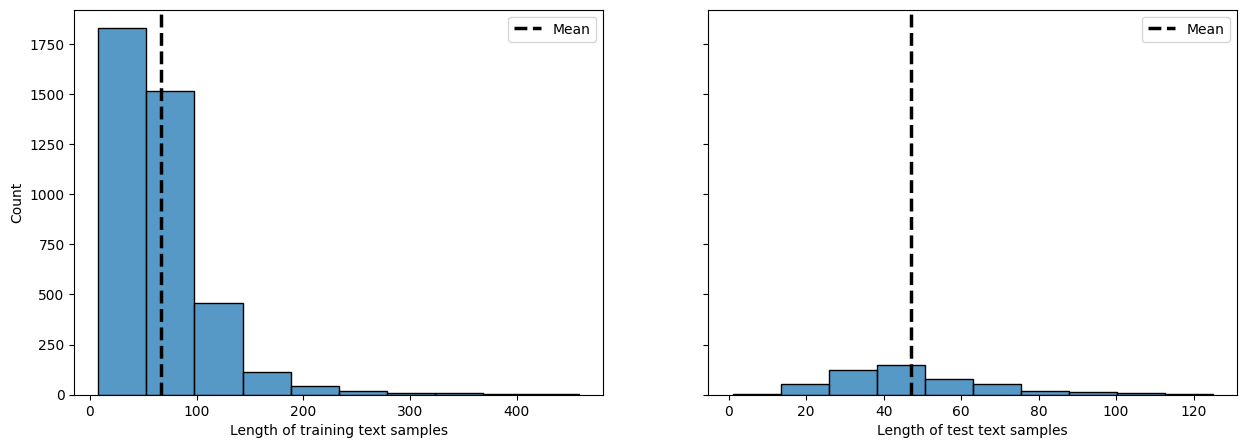

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

train_lengths = train_df["Comments"].str.len()
sns.histplot(ax=axes[0], data=train_lengths, bins=10).set(xlabel="Length of training text samples")
axes[0].axvline(train_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

#dev_lengths = dev_df["text"].str.len()
#sns.histplot(ax=axes[1], data=dev_lengths, bins=10).set(xlabel="Length of dev text samples")
#axes[1].axvline(dev_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
#axes[1].legend()

test_lengths = test_with_label["text"].str.len()
sns.histplot(ax=axes[1], data=test_lengths, bins=10).set(xlabel="Length of test text samples")
axes[1].axvline(test_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()


plt.show()

In [ ]:
print(train_lengths.mean());
print(test_lengths.mean());

66.8495
46.996


In [ ]:
dataset = train_df.filter(['cleanText','Label'])
def data_summary(dataset):

    """
        Comments: Comments per class
        words:  words per class
        u_words: unique words per class
    """
    Comments = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleanText) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].cleanText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        Comments.append(len(list(dataset[dataset.Label == label].cleanText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Comments:{}".format(len(list(dataset[dataset.Label==label].cleanText))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return Comments,words,u_words,class_label

#call the fucntion
Comments,words,u_words,class_names = data_summary(dataset)


Class Name :  non-hate
Number of Comments:2061
Number of Words:21565
Number of Unique Words:9652
Most Frequent Words:

చాలా	149
lo	131
anna	121
ఈ	118
సూపర్	105
ki	104
గారు	104
అన్న	93
sir	92
ga	89

Class Name :  hate
Number of Comments:1939
Number of Words:18251
Number of Unique Words:9178
Most Frequent Words:

ra	142
ki	127
ni	126
lo	120
ga	79
oka	76
na	58
kuda	51
nuvvu	50
నువ్వు	50
Total Number of Unique Words:16421


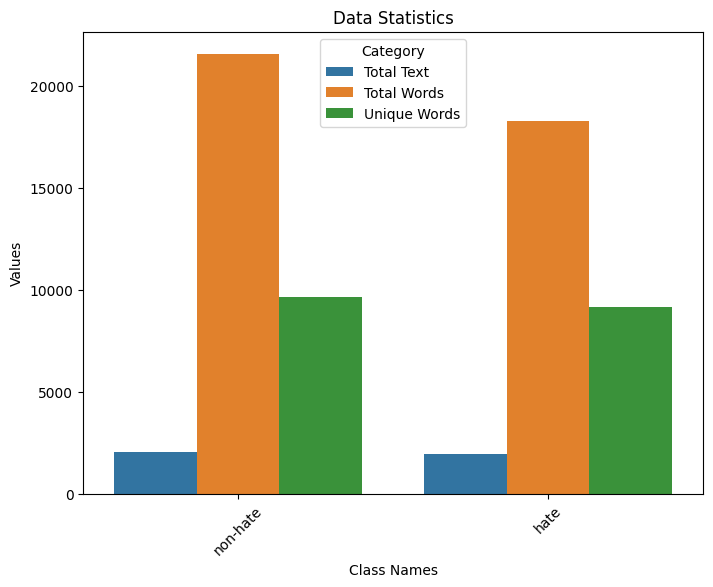

In [ ]:
data_matrix = pd.DataFrame({'Total Text':Comments,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

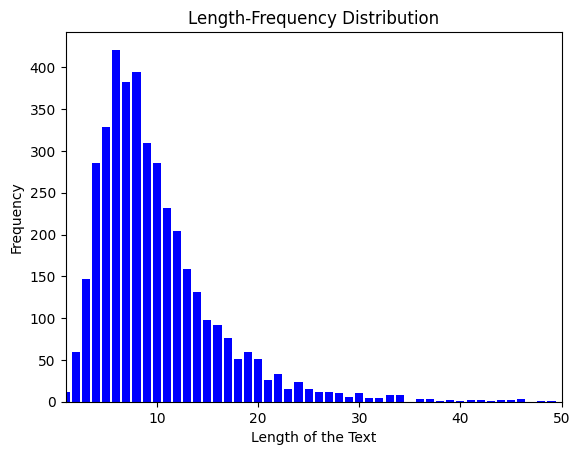

Maximum Length of a Comment: 71
Minimum Length of a Comment: 0
Average Length of a Comment: 10.0


In [ ]:
train_df['Comment_length'] = train_df.cleanText.apply(lambda x:len(x.split()))
frequency = dict()
for i in train_df.Comment_length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 50)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Text')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(train_df.Comment_length)}")
print(f"Minimum Length of a Comment: {min(train_df.Comment_length)}")
print(f"Average Length of a Comment: {round(np.mean(train_df.Comment_length),0)}")

In [ ]:
train_df.loc[train_df['Comment_length'] > 40].shape

(22, 6)

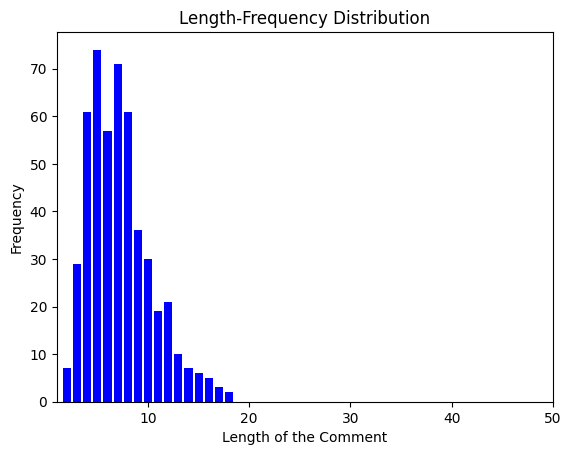

Maximum Length of a Comment: 18
Minimum Length of a Comment: 0
Average Length of a Comment: 7.0


In [ ]:
test_with_label['Comment_length'] = test_with_label.text.apply(lambda x:len(x.split()))
frequency = dict()
for i in test_with_label.Comment_length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 50)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Comment')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(test_with_label.Comment_length)}")
print(f"Minimum Length of a Comment: {min(test_with_label.Comment_length)}")
print(f"Average Length of a Comment: {round(np.mean(test_with_label.Comment_length),0)}")

# Splitting Dataset for Validation

In [14]:
from sklearn.model_selection import train_test_split
Xx_train, Xx_valid, yy_train, yy_valid = train_test_split(train_df['cleanText'], train_df['enc_label'], test_size=0.15, random_state=42, stratify = train_df['enc_label'])

In [15]:
X_train = Xx_train.tolist()
y_train = yy_train.tolist()

X_valid = Xx_valid.tolist()
y_valid = yy_valid.tolist()

X_test = test_with_label['text'].tolist()
y_data_with_label = test_with_label['enc_label'].tolist()

# ML Models

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)  #use class_weight='balanced'
model_rf.fit(X_train_tfidf, y_train)

# Predict on the test set

# Evaluation

In [ ]:
y_pred = model_rf.predict(X_test_tfidf)
accuracy = accuracy_score(y_data_with_label, y_pred)
report = classification_report(y_data_with_label, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)             #estimator 1000--> 0.58      0.57      0.57

Accuracy: 0.5731462925851704

Classification Report:

              precision    recall  f1-score   support



           0       0.56      0.70      0.62       249

           1       0.60      0.44      0.51       250



    accuracy                           0.57       499

   macro avg       0.58      0.57      0.57       499

weighted avg       0.58      0.57      0.57       499




## LR

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression(solver='liblinear', C=1)
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1, solver='liblinear')

In [ ]:
# Predict on the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluation
accuracy_lr = accuracy_score(y_data_with_label, y_pred_lr)
classification_report_lr = classification_report(y_data_with_label, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Classification Report for Logistic Regression:\n', classification_report_lr) # 0.63      0.63      0.63

Logistic Regression Accuracy: 0.6332665330661322

Classification Report for Logistic Regression:

               precision    recall  f1-score   support



           0       0.63      0.63      0.63       249

           1       0.63      0.64      0.64       250



    accuracy                           0.63       499

   macro avg       0.63      0.63      0.63       499

weighted avg       0.63      0.63      0.63       499




## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Support Vector Machine (SVM)
model_svm = SVC(C=1, class_weight='balanced', kernel='linear')
model_svm.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = model_svm.predict(X_test_tfidf)

# Evaluation
accuracy_svm = accuracy_score(y_data_with_label, y_pred_svm)
classification_report_svm = classification_report(y_data_with_label, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('Classification Report for SVM:\n', classification_report_svm) # 0.65      0.65      0.65

SVM Accuracy: 0.6492985971943888

Classification Report for SVM:

               precision    recall  f1-score   support



           0       0.64      0.67      0.65       249

           1       0.66      0.63      0.64       250



    accuracy                           0.65       499

   macro avg       0.65      0.65      0.65       499

weighted avg       0.65      0.65      0.65       499




## Ensemble Majority Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

# Example: Training individual models
model_rf = RandomForestClassifier(n_estimators=1000)  #use class_weight='balanced' if classes are imbalanced
model_rf.fit(X_train_tfidf, y_train)

model_lr = LogisticRegression(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'newton-cg', max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

model_svm = SVC(kernel='linear', C = 1, class_weight = 'balanced')    #kernel='poly'  kernel='rbf'   kernel='sigmoid'
model_svm.fit(X_train_tfidf, y_train)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and trained models
models = [
    ('RandomForest', model_rf),
    ('LogisticRegression', model_lr),
    ('SVM', model_svm),
    ('DecisionTree', model_dt)
]

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='hard') # 'hard' voting for majority class
ensemble_model.fit(X_train_tfidf, y_train)


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=1000)),
                             ('LogisticRegression',
                              LogisticRegression(C=1, class_weight='balanced',
                                                 max_iter=1000,
                                                 solver='newton-cg')),
                             ('SVM',
                              SVC(C=1, class_weight='balanced',
                                  kernel='linear')),
                             ('DecisionTree', DecisionTreeClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = ensemble_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_data_with_label, y_pred)
report = classification_report(y_data_with_label, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5951903807615231

Classification Report:

              precision    recall  f1-score   support



           0       0.57      0.73      0.64       249

           1       0.63      0.46      0.53       250



    accuracy                           0.60       499

   macro avg       0.60      0.60      0.59       499

weighted avg       0.60      0.60      0.59       499




# Deep Learning


## BiLSTM(Word2Vec)


In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Flatten, Dense
from gensim.models import Word2Vec
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [93]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)     #tokenization
tokenizer.fit_on_texts(train_df['cleanText'])
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [94]:
print(vocab_size)

15151


In [95]:
word2vec_model = Word2Vec(sentences=train_df['cleanText'], vector_size=300, window=5, min_count=1, workers=4)
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [96]:
max_len = 100
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_df['cleanText'])
print(len(tokenizer.word_index))
train_pad_sequences =  pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# # Validation Sequences
# validation_sequences = tokenizer.texts_to_sequences(X_valid)
# validation_pad_sequences =  pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
# print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

# Validation Sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_pad_sequences =  pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of test Sequences :" ,test_pad_sequences.shape)

15150
Number of Training Sequences : (4000, 100)
Number of test Sequences : (500, 100)


In [98]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/HOLD/" + "BiLSTM_One.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

model = Sequential([
    Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False),
    Bidirectional(LSTM(units=200, return_sequences=True, dropout=0.2)),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 300)          4545300   
                                                                 
 bidirectional_9 (Bidirecti  (None, 100, 400)          801600    
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 40000)             0         
                                                                 
 dense_12 (Dense)            (None, 1)                 40001     
                                                                 
Total params: 5386901 (20.55 MB)
Trainable params: 841601 (3.21 MB)
Non-trainable params: 4545300 (17.34 MB)
_________________________________________________________________


In [100]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    np.array(train_df['enc_label']),
    epochs=100,
    batch_size=32,
    validation_data=(test_pad_sequences, np.array(y_data_with_label)),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/100
124/125 [============================>.] - ETA: 0s - loss: 0.6901 - accuracy: 0.5098
Epoch 1: val_accuracy improved from -inf to 0.51000, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/BiLSTM_One.h5
125/125 [==============================] - 8s 25ms/step - loss: 0.6902 - accuracy: 0.5092 - val_loss: 0.6972 - val_accuracy: 0.5100
Epoch 2/100
122/125 [============================>.] - ETA: 0s - loss: 0.6878 - accuracy: 0.5266
Epoch 2: val_accuracy did not improve from 0.51000
125/125 [==============================] - 2s 14ms/step - loss: 0.6880 - accuracy: 0.5260 - val_loss: 0.6955 - val_accuracy: 0.4940
Epoch 3/100
125/125 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5220
Epoch 3: val_accuracy did not improve from 0.51000
125/125 [==============================] - 2s 13ms/step - loss: 0.6858 - accuracy: 0.5220 - val_loss: 0.6980 - val_accuracy: 0.5100
Epoch 4/100
125/125 [==============================] - ETA: 0s - loss: 0.6841 - accu

In [101]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

# Generate a classification report
classification_report_loaded_model = classification_report(y_data_with_label, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


16/16 [==============================] - 1s 10ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6471    0.0880    0.1549       250
           1     0.5107    0.9520    0.6648       250

    accuracy                         0.5200       500
   macro avg     0.5789    0.5200    0.4099       500
weighted avg     0.5789    0.5200    0.4099       500



## CNN(Word2Vec)

In [102]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/HOLD/" + "CNN_One.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [103]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

model = Sequential([
    Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 300)          4545300   
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 128)           192128    
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4737557 (18.07 MB)
Trainable params: 192257 (751.00 KB)
Non-trainable params: 4545300 (17.34 MB)
_________________________________________________________________


In [104]:
np.array(train_df['enc_label'])

array([1, 1, 1, ..., 1, 1, 1])

In [105]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    np.array(train_df['enc_label']),
    epochs=100,
    batch_size=32,
    validation_data=(test_pad_sequences, np.array(y_data_with_label)),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/100
124/125 [============================>.] - ETA: 0s - loss: 0.6905 - accuracy: 0.5156
Epoch 1: val_accuracy improved from -inf to 0.49800, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_One.h5
125/125 [==============================] - 3s 8ms/step - loss: 0.6905 - accuracy: 0.5153 - val_loss: 0.7004 - val_accuracy: 0.4980
Epoch 2/100
107/125 [========================>.....] - ETA: 0s - loss: 0.6859 - accuracy: 0.5225
Epoch 2: val_accuracy did not improve from 0.49800
125/125 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5155 - val_loss: 0.7057 - val_accuracy: 0.4980
Epoch 3/100
109/125 [=========================>....] - ETA: 0s - loss: 0.6836 - accuracy: 0.5106
Epoch 3: val_accuracy improved from 0.49800 to 0.50200, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_One.h5
125/125 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5105 - val_loss: 0.7060 - val_accuracy: 0.5020
Epoch 4/100
11

In [106]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

# Generate a classification report
classification_report_loaded_model = classification_report(y_data_with_label, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


16/16 [==============================] - 0s 2ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.5714    0.0800    0.1404       250
           1     0.5054    0.9400    0.6573       250

    accuracy                         0.5100       500
   macro avg     0.5384    0.5100    0.3988       500
weighted avg     0.5384    0.5100    0.3988       500



## CNN + BiLSTM(Word2Vec)

In [107]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/HOLD/" + "CNN_BiLSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [108]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 300)          4545300   
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 128)           192128    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_10 (Bidirect  (None, 19, 400)           526400    
 ional)                                                          
                                                                 
 flatten_9 (Flatten)         (None, 7600)              0         
                                                                 
 dense_14 (Dense)            (None, 1)               

In [109]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    np.array(train_df['enc_label']),
    epochs=100,
    batch_size=32,
    validation_data=(test_pad_sequences, np.array(y_data_with_label)),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/100
124/125 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5050
Epoch 1: val_accuracy improved from -inf to 0.51200, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_BiLSTM.h5
125/125 [==============================] - 5s 15ms/step - loss: 0.6916 - accuracy: 0.5045 - val_loss: 0.6936 - val_accuracy: 0.5120
Epoch 2/100
121/125 [============================>.] - ETA: 0s - loss: 0.6891 - accuracy: 0.5196
Epoch 2: val_accuracy did not improve from 0.51200
125/125 [==============================] - 1s 7ms/step - loss: 0.6889 - accuracy: 0.5203 - val_loss: 0.6954 - val_accuracy: 0.4960
Epoch 3/100
124/125 [============================>.] - ETA: 0s - loss: 0.6876 - accuracy: 0.5202
Epoch 3: val_accuracy did not improve from 0.51200
125/125 [==============================] - 1s 7ms/step - loss: 0.6875 - accuracy: 0.5200 - val_loss: 0.6973 - val_accuracy: 0.5100
Epoch 4/100
121/125 [============================>.] - ETA: 0s - loss: 0.6859 - accura

In [110]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

# Generate a classification report
classification_report_loaded_model = classification_report(y_data_with_label, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

16/16 [==============================] - 1s 4ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.6098    0.1000    0.1718       250
           1     0.5098    0.9360    0.6601       250

    accuracy                         0.5180       500
   macro avg     0.5598    0.5180    0.4160       500
weighted avg     0.5598    0.5180    0.4160       500



## FastText CNN + BiLSTM

In [64]:
from urllib.request import urlopen
import gzip

# get the vectors
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ml.300.vec.gz'))

In [65]:
vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
  values = line.split()
  word = values [0].decode('utf-8')
  vector = np.asarray(values[1:], dtype='float32')
  vocab_and_vectors[word] = vector

In [66]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in word_index.items():
  embedding_vector = vocab_and_vectors.get(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [67]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
# filepath = '/content/drive/MyDrive/Colab Notebooks/HOLD/' +"CNN_BiLSTMFastTExt.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model2 = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix],trainable=False, input_length = max_len),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 80, 300)           4545300   
                                                                 
 conv1d_3 (Conv1D)           (None, 76, 128)           192128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 128)           0         
 D)                                                              
                                                                 
 bidirectional_4 (Bidirecti  (None, 15, 400)           526400    
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 6000)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [68]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model2.fit(
    train_pad_sequences,
    np.array(train_df['enc_label']),
    epochs=100,
    batch_size=32,
    validation_data=(test_pad_sequences, np.array(y_data_with_label)),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/100
117/125 [===========================>..] - ETA: 0s - loss: 0.6705 - accuracy: 0.5777
Epoch 1: val_accuracy improved from -inf to 0.48800, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_BiLSTM.h5
125/125 [==============================] - 66s 20ms/step - loss: 0.6702 - accuracy: 0.5780 - val_loss: 0.6899 - val_accuracy: 0.4880
Epoch 2/100
121/125 [============================>.] - ETA: 0s - loss: 0.6022 - accuracy: 0.6686
Epoch 2: val_accuracy did not improve from 0.48800
125/125 [==============================] - 1s 7ms/step - loss: 0.6025 - accuracy: 0.6675 - val_loss: 0.7301 - val_accuracy: 0.4720
Epoch 3/100
125/125 [==============================] - ETA: 0s - loss: 0.5518 - accuracy: 0.7025
Epoch 3: val_accuracy improved from 0.48800 to 0.49000, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_BiLSTM.h5
125/125 [==============================] - 1s 7ms/step - loss: 0.5518 - accuracy: 0.7025 - val_loss: 0.7454 - val_accuracy: 0.4900
Epoch 

In [69]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

# Generate a classification report
classification_report_loaded_model = classification_report(y_data_with_label, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

16/16 [==============================] - 1s 4ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7449    0.2920    0.4195       250
           1     0.5597    0.9000    0.6902       250

    accuracy                         0.5960       500
   macro avg     0.6523    0.5960    0.5549       500
weighted avg     0.6523    0.5960    0.5549       500



## FastText BiLSTM

In [73]:
num_classes = 2

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = '/content/drive/MyDrive/Colab Notebooks/HOLD/' +"BiLSTMModel_FastText.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix],trainable=False, input_length = max_len),
# tf.keras.layers.Conv1D(128, 2, activation='relu'),
# tf.keras.layers.MaxPooling1D(2),
tf.keras.layers.Bidirectional(LSTM(units = 200,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 80, 300)           4545300   
                                                                 
 bidirectional_7 (Bidirecti  (None, 80, 400)           801600    
 onal)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 32000)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 32001     
                                                                 
Total params: 5378901 (20.52 MB)
Trainable params: 833601 (3.18 MB)
Non-trainable params: 4545300 (17.34 MB)
_________________________________________________________________


In [75]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    np.array(train_df['enc_label']),
    epochs=100,
    batch_size=32,
    validation_data=(test_pad_sequences, np.array(y_data_with_label)),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/100
  5/125 [>.............................] - ETA: 3s - loss: 0.6844 - accuracy: 0.5312

124/125 [============================>.] - ETA: 0s - loss: 0.6733 - accuracy: 0.5587
Epoch 1: val_accuracy improved from -inf to 0.60600, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/BiLSTMModel_FastText.h5
125/125 [==============================] - 10s 21ms/step - loss: 0.6742 - accuracy: 0.5583 - val_loss: 0.6928 - val_accuracy: 0.6060
Epoch 2/100
122/125 [============================>.] - ETA: 0s - loss: 0.6369 - accuracy: 0.6245
Epoch 2: val_accuracy did not improve from 0.60600
125/125 [==============================] - 1s 11ms/step - loss: 0.6368 - accuracy: 0.6237 - val_loss: 0.7152 - val_accuracy: 0.4480
Epoch 3/100
122/125 [============================>.] - ETA: 0s - loss: 0.6144 - accuracy: 0.6501
Epoch 3: val_accuracy did not improve from 0.60600
125/125 [==============================] - 1s 11ms/step - loss: 0.6139 - accuracy: 0.6525 - val_loss: 0.7114 - val_accuracy: 0.4780
Epoch 4/100
124/125 [============================>.] - ETA: 0s - loss: 0.6025 - accur

In [76]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

# Generate a classification report
classification_report_loaded_model = classification_report(y_data_with_label, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)

16/16 [==============================] - 1s 8ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7692    0.3600    0.4905       250
           1     0.5822    0.8920    0.7046       250

    accuracy                         0.6260       500
   macro avg     0.6757    0.6260    0.5975       500
weighted avg     0.6757    0.6260    0.5975       500



## FastText CNN

In [77]:
num_classes = 2            #### change class number

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = "/content/drive/MyDrive/Colab Notebooks/HOLD/" + "CNN_FastText.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

In [78]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

model = Sequential([
    Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 80, 300)           4545300   
                                                                 
 conv1d_4 (Conv1D)           (None, 76, 128)           192128    
                                                                 
 global_max_pooling1d_3 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4737557 (18.07 MB)
Trainable params: 192257 (751.00 KB)
Non-trainable params: 4545300 (17.34 MB)
_________________________________________________________________


In [79]:
np.array(train_df['enc_label'])

array([1, 1, 1, ..., 1, 1, 1])

In [80]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_pad_sequences,
    np.array(train_df['enc_label']),
    epochs=100,
    batch_size=32,
    validation_data=(test_pad_sequences, np.array(y_data_with_label)),
    verbose=1,
    callbacks=callback_list
)
 # as here weight is not using

Epoch 1/100
125/125 [==============================] - ETA: 0s - loss: 0.6603 - accuracy: 0.5972
Epoch 1: val_accuracy improved from -inf to 0.47600, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_FastText.h5
125/125 [==============================] - 2s 7ms/step - loss: 0.6603 - accuracy: 0.5972 - val_loss: 0.6981 - val_accuracy: 0.4760
Epoch 2/100
123/125 [============================>.] - ETA: 0s - loss: 0.6079 - accuracy: 0.6623
Epoch 2: val_accuracy did not improve from 0.47600
125/125 [==============================] - 1s 5ms/step - loss: 0.6084 - accuracy: 0.6615 - val_loss: 0.7273 - val_accuracy: 0.4640
Epoch 3/100
122/125 [============================>.] - ETA: 0s - loss: 0.5713 - accuracy: 0.6926
Epoch 3: val_accuracy improved from 0.47600 to 0.47800, saving model to /content/drive/MyDrive/Colab Notebooks/HOLD/CNN_FastText.h5
125/125 [==============================] - 1s 6ms/step - loss: 0.5706 - accuracy: 0.6950 - val_loss: 0.7233 - val_accuracy: 0.4780
Epoc

In [81]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Assuming y_pred is a 2D array of predicted probabilities for each class
# Adjust axis parameter if needed based on the shape of your y_pred array
loaded_model = load_model(filepath)

# Evaluate the model on the validation set
y_pred = loaded_model.predict(test_pad_sequences)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

# Generate a classification report
classification_report_loaded_model = classification_report(y_data_with_label, y_pred_classes, digits=4)
print('Classification Report for Loaded Model:\n', classification_report_loaded_model)


16/16 [==============================] - 0s 2ms/step
Classification Report for Loaded Model:
               precision    recall  f1-score   support

           0     0.7179    0.3360    0.4578       250
           1     0.5666    0.8680    0.6856       250

    accuracy                         0.6020       500
   macro avg     0.6423    0.6020    0.5717       500
weighted avg     0.6423    0.6020    0.5717       500



# ktrain


In [82]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=91de8e2cb2c450ad669217e9c8a75570181fd95f7670add132f025223a15c467
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [83]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [84]:
import ktrain
from ktrain import text

In [85]:
categories=['hate','non-hate']

# Ktrain indic-SBERT

In [ ]:
model_name = "l3cube-pune/indic-sentence-similarity-sbert"
trans = text.Transformer(model_name,maxlen=100,class_names=categories)    #try with mxlen=100

In [ ]:
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
model = trans.get_classifier()
learner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

In [ ]:
# learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
learner.fit_onecycle(3e-5, 20)   # 15 epochs 70(macro) for 1e-5



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/20
250/250 [==============================] - 83s 260ms/step - loss: 0.6803 - accuracy: 0.6693 - val_loss: 0.6886 - val_accuracy: 0.5260
Epoch 2/20
250/250 [==============================] - 61s 245ms/step - loss: 0.6126 - accuracy: 0.7550 - val_loss: 0.6488 - val_accuracy: 0.6260
Epoch 3/20
250/250 [==============================] - 61s 245ms/step - loss: 0.5323 - accuracy: 0.7958 - val_loss: 0.6054 - val_accuracy: 0.6900
Epoch 4/20
250/250 [==============================] - 61s 245ms/step - loss: 0.4561 - accuracy: 0.8285 - val_loss: 0.6159 - val_accuracy: 0.6840
Epoch 5/20
250/250 [==============================] - 61s 245ms/step - loss: 0.3951 - accuracy: 0.8530 - val_loss: 0.5858 - val_accuracy: 0.7280
Epoch 6/20
250/250 [==============================] - 61s 245ms/step - loss: 0.3358 - accuracy: 0.8817 - val_loss: 0.6772 - val_accuracy: 0.6940
Epoch 7/20
250/250 [==============================] - 61s 245ms/ste

In [ ]:
learner.validate(class_names=categories)

16/16 [==============================] - 4s 70ms/step
              precision    recall  f1-score   support

        hate       0.73      0.70      0.72       250
    non-hate       0.71      0.74      0.73       250

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



array([[176,  74],
       [ 65, 185]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
folder_path = "/kaggle/working/"

predictor.save(folder_path+'Transformers_Models'+'/puneIndicSBERT_1eMinus5_16_20')


In [ ]:
predictor = ktrain.load_predictor("/content/drive/MyDrive/Colab Notebooks/HOLD/"+'Transformers_Models'+'/puneIndicSBERT_1eMinus5_16_20')

In [ ]:
y_pred = predictor.predict(X_test)

In [ ]:
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()

In [ ]:
run.to_csv('/kaggle/working/' +'model1.csv',index = False) # for 3e-5, batch = 16, epochs = 15

In [ ]:
run.to_csv('/kaggle/working/' +'model1.tsv',index = False) # for 3e-5, batch = 16, epochs = 15

In [ ]:
model2 = trans.get_classifier()
learner2 = ktrain.get_learner(model2, train_data=train,val_data=test, batch_size=32)
learner2.fit_onecycle(3e-5,15)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/15
125/125 [==============================] - 73s 444ms/step - loss: 0.6836 - accuracy: 0.6622 - val_loss: 0.6896 - val_accuracy: 0.5180
Epoch 2/15
125/125 [==============================] - 52s 414ms/step - loss: 0.6250 - accuracy: 0.7415 - val_loss: 0.6461 - val_accuracy: 0.6400
Epoch 3/15
125/125 [==============================] - 52s 414ms/step - loss: 0.5370 - accuracy: 0.7968 - val_loss: 0.5951 - val_accuracy: 0.7040
Epoch 4/15
125/125 [==============================] - 52s 414ms/step - loss: 0.4635 - accuracy: 0.8210 - val_loss: 0.5785 - val_accuracy: 0.7180
Epoch 5/15
125/125 [==============================] - 52s 415ms/step - loss: 0.3754 - accuracy: 0.8695 - val_loss: 0.6123 - val_accuracy: 0.7060
Epoch 6/15
125/125 [==============================] - 52s 414ms/step - loss: 0.3175 - accuracy: 0.8910 - val_loss: 0.6079 - val_accuracy: 0.7200
Epoch 7/15
125/125 [==============================] - 52s 415ms/ste

In [ ]:
learner2.validate(class_names=categories)

16/16 [==============================] - 1s 71ms/step
              precision    recall  f1-score   support

        hate       0.72      0.74      0.73       250
    non-hate       0.74      0.72      0.73       250

    accuracy                           0.73       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.73      0.73      0.73       500



array([[186,  64],
       [ 71, 179]])

In [ ]:
predictor = ktrain.get_predictor(learner2.model, preproc=trans)
ffolder_path = "/kaggle/working/"

predictor.save(folder_path+'Transformers_Models'+'/puneIndicSBERT_1eMinus5_32_15')

predictor = ktrain.load_predictor(folder_path+'Transformers_Models'+'/puneIndicSBERT_1eMinus5_32_15')

In [ ]:
y_pred = predictor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_data_with_label, y_pred)
report = classification_report(y_data_with_label, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

In [ ]:
y_pred = predictor.predict(X_test)
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()

In [ ]:
run.to_csv('/kaggle/working/' +'model2.csv',index = False) # for 3e-5, batch = 16, epochs = 15

In [ ]:
run.to_csv('/kaggle/working/' +'model2.tsv',index = False) # for 3e-5, batch = 16, epochs = 15

# Ktrain indicBert

In [ ]:
model_name = 'ai4bharat/indic-bert'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()
Indiclearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
# Indiclearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
Indiclearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
250/250 [==============================] - 77s 227ms/step - loss: 0.6906 - accuracy: 0.5167 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 2/10
250/250 [==============================] - 52s 207ms/step - loss: 0.6724 - accuracy: 0.5895 - val_loss: 0.7527 - val_accuracy: 0.3860
Epoch 3/10
250/250 [==============================] - 52s 207ms/step - loss: 0.6552 - accuracy: 0.6553 - val_loss: 0.6956 - val_accuracy: 0.5420
Epoch 4/10
250/250 [==============================] - 52s 207ms/step - loss: 0.6153 - accuracy: 0.6875 - val_loss: 0.7141 - val_accuracy: 0.5420
Epoch 5/10
250/250 [==============================] - 52s 207ms/step - loss: 0.5587 - accuracy: 0.7312 - val_loss: 0.6614 - val_accuracy: 0.6200
Epoch 6/10
250/250 [==============================] - 52s 207ms/step - loss: 0.5096 - accuracy: 0.7697 - val_loss: 0.6815 - val_accuracy: 0.5980
Epoch 7/10
250/250 [==============================] - 52s 208ms/ste

In [ ]:
Indiclearner.validate(class_names=categories)

16/16 [==============================] - 5s 85ms/step
              precision    recall  f1-score   support

        hate       0.66      0.56      0.61       250
    non-hate       0.62      0.71      0.66       250

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.63       500
weighted avg       0.64      0.64      0.63       500



array([[141, 109],
       [ 73, 177]])

In [ ]:
predictor = ktrain.get_predictor(Indiclearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

In [ ]:
run = pd.DataFrame(test_df['text'])
run['label'] = y_pred
# run
run['label'].value_counts()

In [ ]:
run.to_csv('/kaggle/working/' +'Tamil_Hate_Indic_72_cw.csv',index = False) # for 3e-5, batch = 16, epochs = 15

# Ktrain mBert

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)

In [ ]:
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()
CasedmBertlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: te
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: te
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
# CasedmBertlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
CasedmBertlearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
250/250 [==============================] - 87s 251ms/step - loss: 0.6647 - accuracy: 0.6020 - val_loss: 0.7843 - val_accuracy: 0.4140
Epoch 2/10
250/250 [==============================] - 59s 234ms/step - loss: 0.5792 - accuracy: 0.6990 - val_loss: 0.7263 - val_accuracy: 0.5940
Epoch 3/10
250/250 [==============================] - 59s 234ms/step - loss: 0.5001 - accuracy: 0.7588 - val_loss: 0.6011 - val_accuracy: 0.6860
Epoch 4/10
250/250 [==============================] - 59s 234ms/step - loss: 0.4126 - accuracy: 0.8165 - val_loss: 0.8348 - val_accuracy: 0.6000
Epoch 5/10
250/250 [==============================] - 58s 234ms/step - loss: 0.3194 - accuracy: 0.8620 - val_loss: 0.6973 - val_accuracy: 0.7140
Epoch 6/10
250/250 [==============================] - 58s 234ms/step - loss: 0.2344 - accuracy: 0.9082 - val_loss: 0.9039 - val_accuracy: 0.6700
Epoch 7/10
250/250 [==============================] - 59s 234ms/ste

In [ ]:
CasedmBertlearner.validate(class_names=categories)

16/16 [==============================] - 2s 94ms/step
              precision    recall  f1-score   support

        hate       0.68      0.70      0.69       250
    non-hate       0.70      0.68      0.69       250

    accuracy                           0.69       500
   macro avg       0.69      0.69      0.69       500
weighted avg       0.69      0.69      0.69       500



array([[176,  74],
       [ 81, 169]])

In [ ]:
predictor = ktrain.get_predictor(CasedmBertlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

# Ktrain XLMR

In [ ]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()
XLlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
XLlearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
XLlearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
250/250 [==============================] - 90s 272ms/step - loss: 0.6669 - accuracy: 0.6030 - val_loss: 0.7457 - val_accuracy: 0.4860
Epoch 2/10
250/250 [==============================] - 64s 256ms/step - loss: 0.5913 - accuracy: 0.6890 - val_loss: 0.6905 - val_accuracy: 0.5460
Epoch 3/10
250/250 [==============================] - 64s 255ms/step - loss: 0.5311 - accuracy: 0.7350 - val_loss: 0.5722 - val_accuracy: 0.7080
Epoch 4/10
250/250 [==============================] - 64s 255ms/step - loss: 0.4924 - accuracy: 0.7648 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 5/10
250/250 [==============================] - 64s 255ms/step - loss: 0.4657 - accuracy: 0.7822 - val_loss: 0.6109 - val_accuracy: 0.6840
Epoch 6/10
250/250 [==============================] - 64s 255ms/step - loss: 0.3971 - accuracy: 0.8195 - val_loss: 0.6864 - val_accuracy: 0.7100
Epoch 7/10
250/250 [==============================] - 64s 255ms/ste

In [ ]:
XLlearner.validate(class_names=categories)

16/16 [==============================] - 4s 71ms/step
              precision    recall  f1-score   support

        hate       0.71      0.75      0.73       250
    non-hate       0.73      0.69      0.71       250

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



array([[187,  63],
       [ 78, 172]])

In [ ]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)
# y_pred

# Ktrain DistilmBert

In [ ]:
model_name = 'distilbert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()
Distillearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
Distillearner.lr_find(show_plot = True,max_epochs=15)

In [ ]:
Distillearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
250/250 [==============================] - 46s 140ms/step - loss: 0.6451 - accuracy: 0.6330 - val_loss: 0.7364 - val_accuracy: 0.4820
Epoch 2/10
250/250 [==============================] - 33s 131ms/step - loss: 0.5459 - accuracy: 0.7303 - val_loss: 0.7180 - val_accuracy: 0.5960
Epoch 3/10
250/250 [==============================] - 33s 130ms/step - loss: 0.4477 - accuracy: 0.7930 - val_loss: 0.7408 - val_accuracy: 0.6320
Epoch 4/10
250/250 [==============================] - 33s 130ms/step - loss: 0.3794 - accuracy: 0.8365 - val_loss: 0.6946 - val_accuracy: 0.6680
Epoch 5/10
250/250 [==============================] - 33s 131ms/step - loss: 0.2862 - accuracy: 0.8840 - val_loss: 0.7152 - val_accuracy: 0.7020
Epoch 6/10
250/250 [==============================] - 33s 130ms/step - loss: 0.2029 - accuracy: 0.9200 - val_loss: 0.8195 - val_accuracy: 0.6800
Epoch 7/10
250/250 [==============================] - 33s 131ms/ste

In [ ]:
Distillearner.validate(class_names=categories)

16/16 [==============================] - 2s 49ms/step
              precision    recall  f1-score   support

        hate       0.67      0.68      0.67       250
    non-hate       0.67      0.66      0.67       250

    accuracy                           0.67       500
   macro avg       0.67      0.67      0.67       500
weighted avg       0.67      0.67      0.67       500



array([[170,  80],
       [ 85, 165]])

In [ ]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(test_with_label['label'], y_pred)
report = classification_report(test_with_label['label'], y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Ktrain mBert Uncased

In [ ]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()
mBertUncasedLearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [ ]:
mBertUncasedLearner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
mBertUncasedLearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
250/250 [==============================] - 81s 246ms/step - loss: 0.6446 - accuracy: 0.6205 - val_loss: 0.7717 - val_accuracy: 0.5240
Epoch 2/10
250/250 [==============================] - 58s 231ms/step - loss: 0.5361 - accuracy: 0.7260 - val_loss: 0.6612 - val_accuracy: 0.6380
Epoch 3/10
250/250 [==============================] - 58s 231ms/step - loss: 0.4413 - accuracy: 0.7933 - val_loss: 0.6860 - val_accuracy: 0.6360
Epoch 4/10
250/250 [==============================] - 58s 231ms/step - loss: 0.3387 - accuracy: 0.8550 - val_loss: 0.9592 - val_accuracy: 0.6160
Epoch 5/10
250/250 [==============================] - 58s 230ms/step - loss: 0.2607 - accuracy: 0.8920 - val_loss: 0.9953 - val_accuracy: 0.6520
Epoch 6/10
250/250 [==============================] - 58s 231ms/step - loss: 0.1729 - accuracy: 0.9348 - val_loss: 0.9448 - val_accuracy: 0.6660
Epoch 7/10
250/250 [==============================] - 58s 231ms/ste

In [ ]:
mBertUncasedLearner.validate(class_names=categories)

16/16 [==============================] - 5s 77ms/step
              precision    recall  f1-score   support

        hate       0.63      0.71      0.67       250
    non-hate       0.67      0.59      0.63       250

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



array([[177,  73],
       [102, 148]])

In [ ]:
predictor = ktrain.get_predictor(XLlearner.model, preproc=trans)
y_pred = predictor.predict(X_test)

# Ktrain MuRIL

In [91]:
model_name = 'google/muril-base-cased'
trans = text.Transformer(model_name,maxlen=100,class_names=categories)
train = trans.preprocess_train(train_df['cleanText'].tolist(), train_df['enc_label'].tolist())
test = trans.preprocess_test(X_test, y_data_with_label)
model = trans.get_classifier()

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 7
	95percentile : 13
	99percentile : 16


In [87]:
MuRILlearner = ktrain.get_learner(model, train_data=train,val_data=test, batch_size=16)

In [ ]:
MuRILlearner.lr_find(show_plot = True,max_epochs=15)

In [88]:
MuRILlearner.fit_onecycle(3e-5,10)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/10
250/250 [==============================] - 128s 420ms/step - loss: 0.6895 - accuracy: 0.5525 - val_loss: 0.7041 - val_accuracy: 0.4020
Epoch 2/10
250/250 [==============================] - 101s 404ms/step - loss: 0.6273 - accuracy: 0.6948 - val_loss: 0.6594 - val_accuracy: 0.6420
Epoch 3/10
250/250 [==============================] - 102s 408ms/step - loss: 0.5099 - accuracy: 0.7695 - val_loss: 0.5990 - val_accuracy: 0.6960
Epoch 4/10
250/250 [==============================] - 104s 416ms/step - loss: 0.3984 - accuracy: 0.8342 - val_loss: 0.6614 - val_accuracy: 0.6720
Epoch 5/10
250/250 [==============================] - 101s 405ms/step - loss: 0.3083 - accuracy: 0.8835 - val_loss: 0.6732 - val_accuracy: 0.6920
Epoch 6/10
250/250 [==============================] - 101s 406ms/step - loss: 0.2395 - accuracy: 0.9140 - val_loss: 0.6287 - val_accuracy: 0.7360
Epoch 7/10
250/250 [==============================] - 101s 40

In [89]:
MuRILlearner.validate(class_names=categories)

16/16 [==============================] - 6s 130ms/step
              precision    recall  f1-score   support

        hate       0.73      0.74      0.74       250
    non-hate       0.74      0.72      0.73       250

    accuracy                           0.73       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.73      0.73      0.73       500



array([[186,  64],
       [ 69, 181]])